*2021.11.01* progress updated:
```
[100%] Granger causality test
[100%] Johanson's Cointegration Test
[100%] ADF
[100%] Lag order tunning
[90%]  VAR modeling，without proper markdown
[100%] ACF plotting
[100%] Impulse response analysis

(deprecated)[0%] intervention analysis
(deprecated)[0%] causalimpact algorithm

(deprecated)[0%] Survivor analysis
    - [100%]Definition of dead reit
      - 99% boundary of the distribution
      Ref-1 points out that the  normal scale of the volatility is between 13.5% to 16.6%
      - if there's no support reference paper or research, just use common sense in statistic
    - [0%]Proportional hazards regression
    - [0%]Kaplan-Meier Survivor function estimation
    - [0%]Cumulative incidence function estimation
```
[modeling part](https://colab.research.google.com/drive/1cdrkqc76XMvNAK_HwOGOZO3vNq27r6B4#scrollTo=Se7mex2yD_ql&line=4&uniqifier=1)<br>
[Ref-0](https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/) : the tutorial of the whole study, from Granger causality test to VAR<br>
[Ref-1](https://www.reit.com/news/blog/market-commentary/reit-volatility-correlation-beta-and-alpha-as-of-mid-2017-not-your-fathers-small-cap-value-stocks-thank-goodness#:~:text=REIT%20volatility%20has%20usually%20ranged,between%2015.9%25%20and%2017.9%25.)<br>
[Ref-2](https://www.statsmodels.org/dev/vector_ar.html) : Impulse response analysis


Python for dummies: download data and plotting
---

主要目標：讓沒有學過程式的人也能趕快下載資料<br>
Step1. 安裝需要的package，這邊只有yfinance一個，其他系統都幫你安裝好了

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 17.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Step2. 新增會用到的函數包
語法都是:<br>
import XXX<br>
import XXX as OO
(縮寫用)<br>
這邊都已經幫你把會用到的寫上去了

In [ ]:
import pandas as pd
#處理圖表用
import numpy as np
import math
#處理運算用
import matplotlib.pyplot as plt
%matplotlib inline
#畫圖用的
import datetime as dt
#把文字轉成時間用的
import yfinance as yf
#本次核心，下載資料用的

import warnings
warnings.filterwarnings('ignore')
#把warning省略掉

Step3. 設定你要下載的標的。這邊你必須給的設定包含以下三個：

1.   標的ticker（就像0050這種東西，記得後面要對應國碼。e.g. 0050.TW）
2.   開始日期
3.   結束日期

不足的部份他會自動跳過<br>
(e.g. 資料從2020.1.1才有，但是設定2019.1.1為起始日，他會自己從有資料那天開始下載。)

In [ ]:
AOF = 'AOF.AX'
#這邊把ticker寫成變數只是求整潔，你爽的話也可以直接整個字串打上去。
#ticker的代碼一律比照yahoo finance上面公告的號碼，可以先去官網查詢或google
AVN = 'AVN.AX'
CDP = 'CDP.AX'
ADI = 'ADI.AX'
CQR = 'CQR.AX'

In [ ]:
start = dt.datetime(2019, 1, 1)
#同理。這邊把日期寫成變數只是求整潔，你爽的話也可以直接整個函數打上去。
end = dt.datetime(2021, 8, 31)

In [ ]:
df_aof = yf.download(AOF, start, end)
#yf.download()這個函數就是下載用的，格式為yf.download(ticker, 起始日, 結束日)
#把他寫成變數就是讓這個變數儲存他載下來的資料
df_avn = yf.download(AVN, start, end)
df_cdp = yf.download(CDP, start, end)
df_adi = yf.download(ADI, start, end)
df_cqr = yf.download(CQR, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_aof
#叫資料出來看看，欄位的意思就是字面上所示

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2.67,2.67,2.58,2.62,2.207958,71801
2019-01-03,2.63,2.66,2.58,2.61,2.199530,64259
2019-01-04,2.60,2.65,2.60,2.63,2.216385,62349
2019-01-07,2.65,2.69,2.60,2.67,2.250094,83303
2019-01-08,2.60,2.70,2.60,2.69,2.266949,10506
...,...,...,...,...,...,...
2021-08-25,2.49,2.50,2.46,2.49,2.450244,34006
2021-08-26,2.50,2.50,2.45,2.47,2.430563,52526
2021-08-27,2.45,2.46,2.38,2.44,2.401042,145227


In [ ]:
#df_aof.to_csv('aof.csv')
#可以用.to_csv()這個函數把這個資料輸出成csv，這樣也可以下載下來去excel用

In [ ]:
df_aof = df_aof[['Adj Close']].copy()
#把調整過後的收盤價獨立出來，後面要計算日報酬
df_avn = df_avn[['Adj Close']].copy()
df_cdp = df_cdp[['Adj Close']].copy()
df_adi = df_adi[['Adj Close']].copy()
df_cqr = df_cqr[['Adj Close']].copy()

In [ ]:
def price2return(df_):
    df_['Ret'] = (df_['Adj Close']-df_['Adj Close'].shift(1))/df_['Adj Close']
    #上面這行大概的意思就是 日報酬 = 後減前除以前
    df_['Ret'].fillna(df_.Ret.mean(),inplace=True)
    #因為有一個會沒有的減，所以幫他填平均值回去
    return df_
#總之就是一個簡單的函數，可以把收盤價丟進去，跑日報酬出來

In [ ]:
price2return(df_aof)
price2return(df_avn)
price2return(df_cdp)
price2return(df_adi)
price2return(df_cqr)

,Adj Close,Ret
Date,,
2019-01-02,3.808350,-0.000194
2019-01-03,3.885373,0.019824
2019-01-04,3.859699,-0.006652
2019-01-07,3.842582,-0.004455
2019-01-08,3.851140,0.002222
...,...,...
2021-08-25,3.830000,-0.002611
2021-08-26,3.800000,-0.007895
2021-08-27,3.810000,0.002625


In [ ]:
df_aof.rename(columns={'Ret':'AOF_Ret'},inplace=True)
#調整一下欄位名稱
df_avn.rename(columns={'Ret':'AVN_Ret'},inplace=True)
df_cdp.rename(columns={'Ret':'CDP_Ret'},inplace=True)
df_adi.rename(columns={'Ret':'ADI_Ret'},inplace=True)
df_cqr.rename(columns={'Ret':'CQR_Ret'},inplace=True)

df_aof.rename(columns={'Adj Close':'AOF_Adj Close'},inplace=True)
df_avn.rename(columns={'Adj Close':'AVN_Adj Close'},inplace=True)
df_cdp.rename(columns={'Adj Close':'CDP_Adj Close'},inplace=True)
df_adi.rename(columns={'Adj Close':'ADI_Adj Close'},inplace=True)
df_cqr.rename(columns={'Adj Close':'CQR_Adj Close'},inplace=True)

In [ ]:
df_ret_temp = pd.concat([df_aof['AOF_Ret'],df_avn['AVN_Ret'],df_cdp['CDP_Ret'],df_adi['ADI_Ret'],df_cqr['CQR_Ret']],axis=1)
#把日報酬拉出來合併成一張

In [ ]:
df_ret_temp

,AOF_Ret,AVN_Ret,CDP_Ret,ADI_Ret,CQR_Ret
Date,,,,,
2019-01-02,-0.000119,0.000661,-0.000723,0.000447,-0.000194
2019-01-03,-0.003831,-0.019048,0.013793,0.010909,0.019824
2019-01-04,0.007605,0.009434,-0.009749,-0.007326,-0.006652
2019-01-07,0.014981,-0.009524,-0.005602,0.003650,-0.004455
2019-01-08,0.007435,0.000000,-0.004219,-0.022388,0.002222
...,...,...,...,...,...
2021-08-25,-0.016064,0.000000,0.004454,-0.020231,-0.002611
2021-08-26,-0.008097,0.006042,0.000000,0.005747,-0.007895
2021-08-27,-0.012295,-0.009146,0.002222,-0.011628,0.002625


In [ ]:
df_adj_temp = pd.concat([df_aof['AOF_Adj Close'],df_avn['AVN_Adj Close'],df_cdp['CDP_Adj Close'],df_adi['ADI_Adj Close'],df_cqr['CQR_Adj Close']],axis=1)
#收盤價也拉出來併成一張

In [ ]:
df_adj_temp

,AOF_Adj Close,AVN_Adj Close,CDP_Adj Close,ADI_Adj Close,CQR_Adj Close
Date,,,,,
2019-01-02,2.207958,1.822830,6.425899,2.306108,3.808350
2019-01-03,2.199530,1.788759,6.515772,2.331543,3.885373
2019-01-04,2.216385,1.805794,6.452860,2.314587,3.859699
2019-01-07,2.250094,1.788759,6.416912,2.323065,3.842582
2019-01-08,2.266949,1.788759,6.389950,2.272195,3.851140
...,...,...,...,...,...
2021-08-25,2.450244,3.245407,4.490000,3.417244,3.830000
2021-08-26,2.430563,3.265136,4.490000,3.436997,3.800000
2021-08-27,2.401042,3.235542,4.500000,3.397492,3.810000


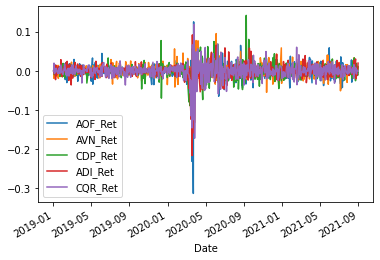

In [ ]:
df_ret_temp.plot()
#.plot()就是畫資料的折線圖用的函數

In [ ]:
df_adj_temp.describe()
#.describe()就是把敘述統計，好比平均值標準差那些算出來的函數

,AOF_Adj Close,AVN_Adj Close,CDP_Adj Close,ADI_Adj Close,CQR_Adj Close
count,676.000000,676.000000,676.000000,676.000000,676.000000
mean,2.272590,2.326246,4.780742,2.599693,3.652165
std,0.271190,0.438185,1.227426,0.341134,0.397212
min,1.336828,1.274444,2.471696,1.558923,2.565504
25%,2.032853,1.969659,3.873908,2.405087,3.392396
50%,2.300355,2.357064,4.443467,2.562086,3.752672
75%,2.530696,2.621714,6.039446,2.806871,3.912280
max,2.745108,3.284864,6.560709,3.555514,4.610602


In [ ]:
df_ret_temp.describe()

,AOF_Ret,AVN_Ret,CDP_Ret,ADI_Ret,CQR_Ret
count,676.000000,676.000000,676.000000,676.000000,676.000000
mean,-0.000119,0.000661,-0.000723,0.000447,-0.000194
std,0.022228,0.020781,0.019795,0.018494,0.019971
min,-0.313333,-0.187500,-0.151515,-0.216438,-0.172297
25%,-0.006734,-0.007449,-0.007536,-0.006700,-0.006956
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.008045,0.009306,0.006667,0.007024,0.008589
max,0.125365,0.095349,0.141914,0.092040,0.119048


In [ ]:
df_adj_temp.corr()
#.corr()就是看他們的相關係數用的函數

,AOF_Adj Close,AVN_Adj Close,CDP_Adj Close,ADI_Adj Close,CQR_Adj Close
AOF_Adj Close,1.000000,0.460418,0.756939,0.461844,0.858359
AVN_Adj Close,0.460418,1.000000,0.018070,0.953616,0.387807
CDP_Adj Close,0.756939,0.018070,1.000000,0.095385,0.833574
ADI_Adj Close,0.461844,0.953616,0.095385,1.000000,0.420868
CQR_Adj Close,0.858359,0.387807,0.833574,0.420868,1.000000


In [ ]:
df_ret_temp.corr()

,AOF_Ret,AVN_Ret,CDP_Ret,ADI_Ret,CQR_Ret
AOF_Ret,1.000000,0.412729,0.323655,0.474850,0.346474
AVN_Ret,0.412729,1.000000,0.375535,0.505649,0.589152
CDP_Ret,0.323655,0.375535,1.000000,0.340484,0.335004
ADI_Ret,0.474850,0.505649,0.340484,1.000000,0.492773
CQR_Ret,0.346474,0.589152,0.335004,0.492773,1.000000


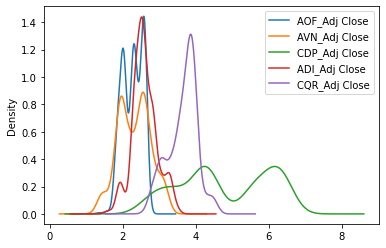

In [ ]:
df_adj_temp.plot(kind='kde')
#.plot(kind='kde)就是看資料分佈情況的函數

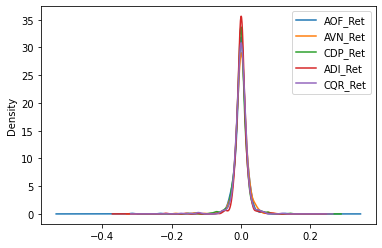

In [ ]:
df_ret_temp.plot(kind='kde')

In [ ]:
df_adj_temp.cov()
#看covarience用的

,AOF_Adj Close,AVN_Adj Close,CDP_Adj Close,ADI_Adj Close,CQR_Adj Close
AOF_Adj Close,0.073544,0.054712,0.251959,0.042726,0.092462
AVN_Adj Close,0.054712,0.192006,0.009719,0.142546,0.067499
CDP_Adj Close,0.251959,0.009719,1.506574,0.039939,0.406408
ADI_Adj Close,0.042726,0.142546,0.039939,0.116372,0.057029
CQR_Adj Close,0.092462,0.067499,0.406408,0.057029,0.157777


In [ ]:
df_ret_temp.cov()

,AOF_Ret,AVN_Ret,CDP_Ret,ADI_Ret,CQR_Ret
AOF_Ret,0.000494,0.000191,0.000142,0.000195,0.000154
AVN_Ret,0.000191,0.000432,0.000154,0.000194,0.000245
CDP_Ret,0.000142,0.000154,0.000392,0.000125,0.000132
ADI_Ret,0.000195,0.000194,0.000125,0.000342,0.000182
CQR_Ret,0.000154,0.000245,0.000132,0.000182,0.000399


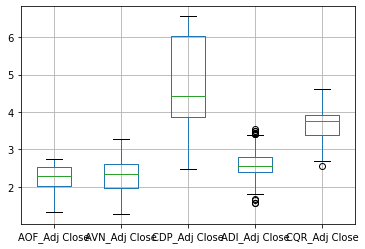

In [ ]:
df_adj_temp.boxplot()
#畫qqplot用的

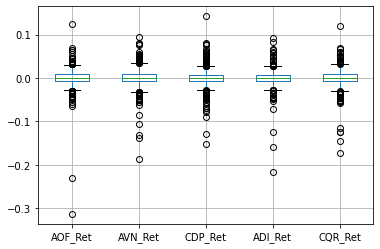

In [ ]:
df_ret_temp.boxplot()

附錄：可能會用到但不知道你需不需要的東西

In [ ]:
#df_aof_2 = yf.Ticker(AOF)
#yf.Ticker()這個函數可以讓你去調閱該檔股票的其他相關資訊
#下載過後的資料後面直接接上 .對應功能 即可查看

In [ ]:
#df_aof_2.info
#基本資訊

In [ ]:
#df_aof_2.financials
#財報

In [ ]:
#df_aof_2.quarterly_financials
#季報

In [ ]:
#df_aof_2.major_holders
#當下持股結構

In [ ]:
#df_aof_2.institutional_holders
#機構持有人名單(沒有的話就代表沒有)

In [ ]:
#df_aof_2.balance_sheet

In [ ]:
#df_aof_2.quarterly_balance_sheet

In [ ]:
#df_aof_2.recommendations
#投顧買進賣出推薦(沒有的話就代表沒有)

In [ ]:
#df_aof_2.cashflow

In [ ]:
#df_aof_2.quarterly_cashflow

In [ ]:
#df_aof_2.earnings

In [ ]:
#df_aof_2.quarterly_earnings

Modeling: VAR
---
在VAR建模前，需要跑多個檢定，針對數據資料進行確認資料的序列型態，就是是否為平穩態（stationary）以及穩健與否(robust)
Working pipeline如下：

1. Granger causality test（檢測標的之間的連帶因果關係有沒有存在，就是他們有沒有互相影響對方）
2. Johanson's Cointegration Test（檢測標的之間是否有長期、且有統計上顯著的關係性）
3. ADF test （計量的東西）

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.stattools import grangercausalitytests
#Max口試時有被問到為什麼不用Granger causality，所以這次我有將檢測機制設定的更完善一點
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [ ]:
maxlag=10
#test time lag我設定10日的理由只是因為剛好兩個開盤日，你可以自己調整

test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """
    這邊的 Granger causality test 是用來檢測資料之間是否存在任何因果關係
    H_0是沒有因果關係，H_a反之
    一般來說我們是預期他全部都有顯著因果關係，如果這邊測出來沒有的話就要做額外的線性轉換
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            #雙層do loop去讓他構成矩陣
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [ ]:
grangers_causation_matrix(df_adj_temp, variables = df_adj_temp.columns)

,AOF_Adj Close_x,AVN_Adj Close_x,CDP_Adj Close_x,ADI_Adj Close_x,CQR_Adj Close_x
AOF_Adj Close_y,1.0000,0.0000,0.0001,0.0,0.0000
AVN_Adj Close_y,0.0004,1.0000,0.0003,0.0,0.0002
CDP_Adj Close_y,0.0008,0.0018,1.0000,0.0,0.0000
ADI_Adj Close_y,0.0000,0.0000,0.0061,1.0,0.0000
CQR_Adj Close_y,0.0000,0.0208,0.0000,0.0,1.0000


In [ ]:
grangers_causation_matrix(df_ret_temp, variables = df_ret_temp.columns)

,AOF_Ret_x,AVN_Ret_x,CDP_Ret_x,ADI_Ret_x,CQR_Ret_x
AOF_Ret_y,1.0,0.0000,0.0000,0.0,0.0000
AVN_Ret_y,0.0,1.0000,0.0001,0.0,0.0013
CDP_Ret_y,0.0,0.0004,1.0000,0.0,0.0000
ADI_Ret_y,0.0,0.0000,0.0011,1.0,0.0000
CQR_Ret_y,0.0,0.0001,0.0000,0.0,1.0000


如果全部都小於 $\alpha = 0.05$ 的門檻，就證明了價格跟日報酬率在這個區段的表現都有顯著因果關係性存在

In [ ]:
def cointegration_test(df, alpha=0.05): 
    """這邊的Johanson's Cointegration Test是在檢測資料標的之間是否有長期、且有統計上顯著的關係性"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Significance  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [ ]:
cointegration_test(df_adj_temp)

Name   ::  Test Stat > C(95%)    =>   Significance  
 ----------------------------------------
AOF_Adj Close ::  46.98     > 60.0627   =>   False
AVN_Adj Close ::  22.58     > 40.1749   =>   False
CDP_Adj Close ::  12.52     > 24.2761   =>   False
ADI_Adj Close ::  6.39      > 12.3212   =>   False
CQR_Adj Close ::  0.85      > 4.1296    =>   False


In [ ]:
cointegration_test(df_ret_temp)

Name   ::  Test Stat > C(95%)    =>   Significance  
 ----------------------------------------
AOF_Ret ::  625.7     > 60.0627   =>   True
AVN_Ret ::  430.08    > 40.1749   =>   True
CDP_Ret ::  282.84    > 24.2761   =>   True
ADI_Ret ::  152.56    > 12.3212   =>   True
CQR_Ret ::  52.5      > 4.1296    =>   True


所以到這邊可以下結論判斷:<br>
```
1. 價格跟日報酬兩個資料族群內部，都具有時間上的因果關係性
2. 價格資料族群內部，並不存在長期且穩定的顯著關聯性
3. 日報酬資料族群內部，並不存在長期且穩定的顯著關聯性
```

進一步講故事的話，可能推論是：<br>
```
1.  在價格上的反應，受到市場變化時，每一檔標的之收盤價對於市場趨勢的反應不一致，且又受到各檔資本規模不同 ，導致他們在價格表現上不一定具有長期穩定的關聯性。
2.  但是在報酬率反應上，這些標的之間的反應連動是具有顯著因果性，且長期統計上顯著相關，所以可以推論其在報酬表現上具有更多可比性存在。
```

再來是進入建模前的設定，在這邊必須將資料進行切分，分別為模型訓練段與測試段。<br>
這邊為求方便，所以測試段我只安排了5天，你有需要可以自己調整；<br>不過一般來說不會配太長的測試段，不然訓練量不足的話模型的驗證能力會不足。

In [ ]:
nobs = 5
df_adj_train, df_adj_test = df_adj_temp[0:-nobs], df_adj_temp[-nobs:]

# Check size
print(df_adj_train.shape)  
print(df_adj_test.shape)  

(671, 5)
(5, 5)


In [ ]:
nobs = 5
df_ret_train, df_ret_test = df_ret_temp[0:-nobs], df_ret_temp[-nobs:]

# Check size
print(df_ret_train.shape)  
print(df_ret_test.shape) 

(671, 5)
(5, 5)


In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for name, column in df_adj_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AOF_Adj Close" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9441
 No. Lags Chosen       = 5
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.3116. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "AVN_Adj Close" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.9499
 No. Lags Chosen       = 4
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.7711. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CDP_Adj Close" 
    -----------------------------------------------
 Null Hyp

In [ ]:
for name, column in df_ret_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "AOF_Ret" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.5269
 No. Lags Chosen       = 10
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "AVN_Ret" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.1211
 No. Lags Chosen       = 4
 Critical value 1%     = -3.44
 Critical value 5%     = -2.866
 Critical value 10%    = -2.569
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CDP_Ret" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level   

收盤價為不穩定，日報酬為穩定(廢話)<br>
所以針對日報酬進行建模


In [ ]:
model = VAR(df_ret_train)
result = model.select_order(maxlags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
result.summary()

,AIC,BIC,FPE,HQIC
0,-40.21,-40.18*,3.441e-18,-40.20
1,-40.36,-40.16,2.952e-18,-40.28
2,-40.55,-40.17,2.449e-18,-40.40
3,-40.69,-40.14,2.136e-18,-40.47
4,-40.77,-40.04,1.975e-18,-40.49*
5,-40.80,-39.91,1.906e-18,-40.46
6,-40.83,-39.76,1.854e-18,-40.42
7,-40.85,-39.61,1.826e-18,-40.36
8,-40.84,-39.43,1.831e-18,-40.30
9,-40.85*,-39.27,1.820e-18*,-40.23


lag order=9的時候AIC最小，且後面有rebound，挑這個進行建模

這邊藉由auto-tuning用出來的lag-order可以下一段推論：

```
這些標的在時間特性表現上的lag相較於黃金、白銀等避險貴金屬又更加縮短
合理推論其避險性在受到大型市場事件時，會有所降低，導致其時間特性更趨向一般投資產品
```

In [ ]:
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 05, Dec, 2021
Time:                     13:09:01
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -39.3536
Nobs:                     662.000    HQIC:                  -40.3101
Log likelihood:           9076.32    FPE:                1.70274e-18
AIC:                     -40.9154    Det(Omega_mle):     1.21695e-18
--------------------------------------------------------------------
Results for equation AOF_Ret
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const             -0.000194         0.000750           -0.259           0.796
L1.AOF_Ret        -0.265451         0.044959           -5.904           0.000
L1.AVN_Ret         0.087891         0.050530            1.739         

ACF圖（確認他們在VAR建模的前提下，不存在季節性）

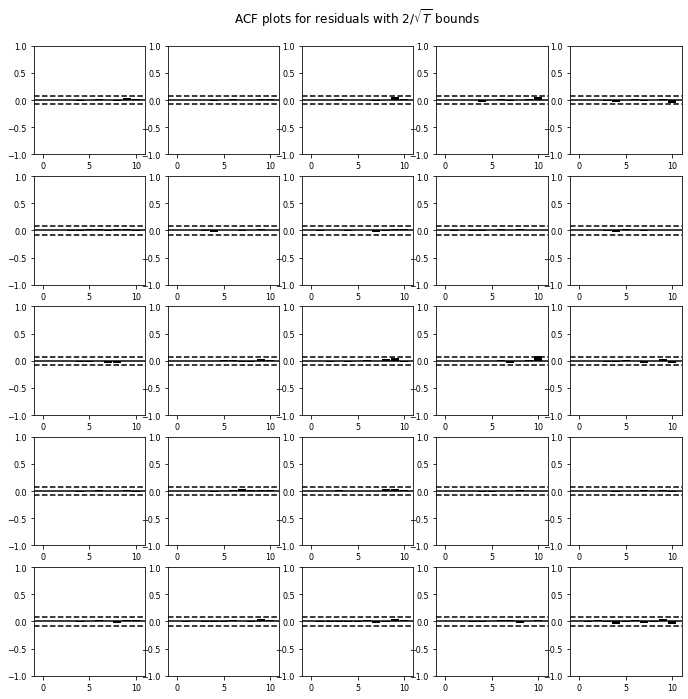

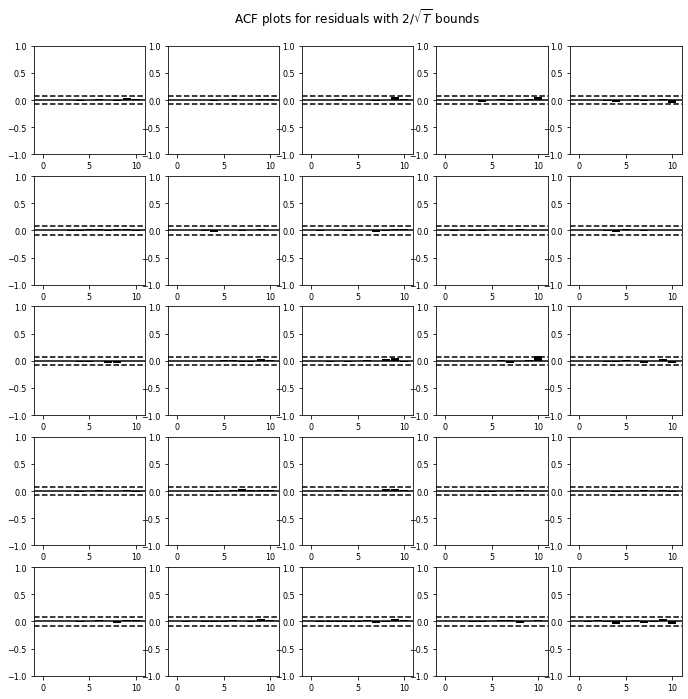

In [ ]:
model_fitted.plot_acorr()

In [ ]:
irf = model_fitted.irf(10)

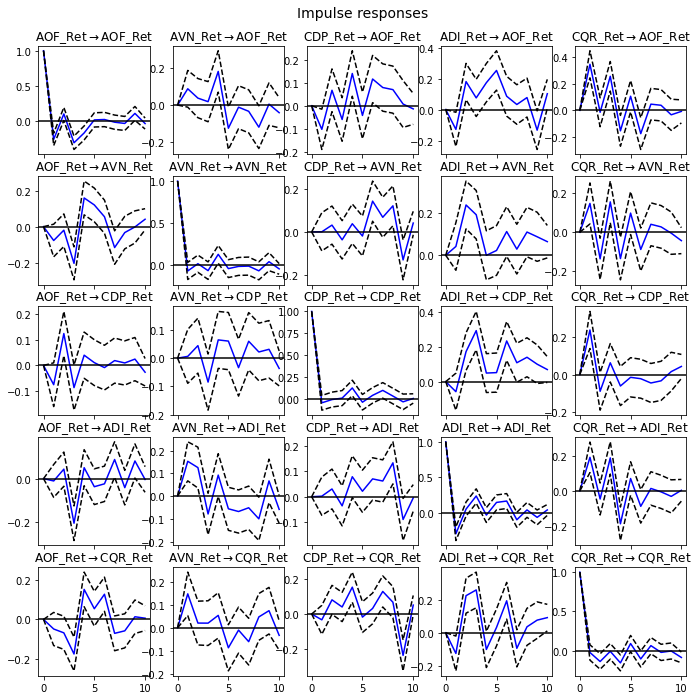

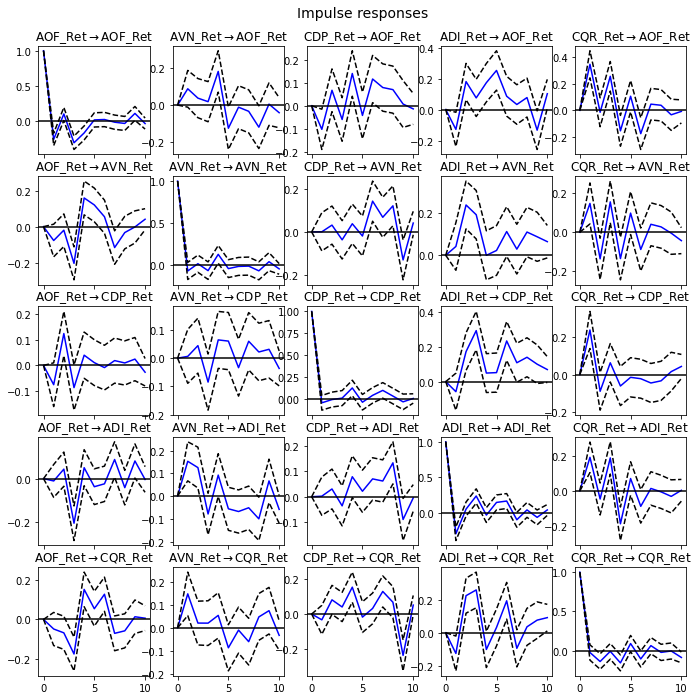

In [ ]:
irf.plot(orth=False)
#AB互比 倆倆關係 A受到一個大衝擊B會怎麼反應 95信心範圍

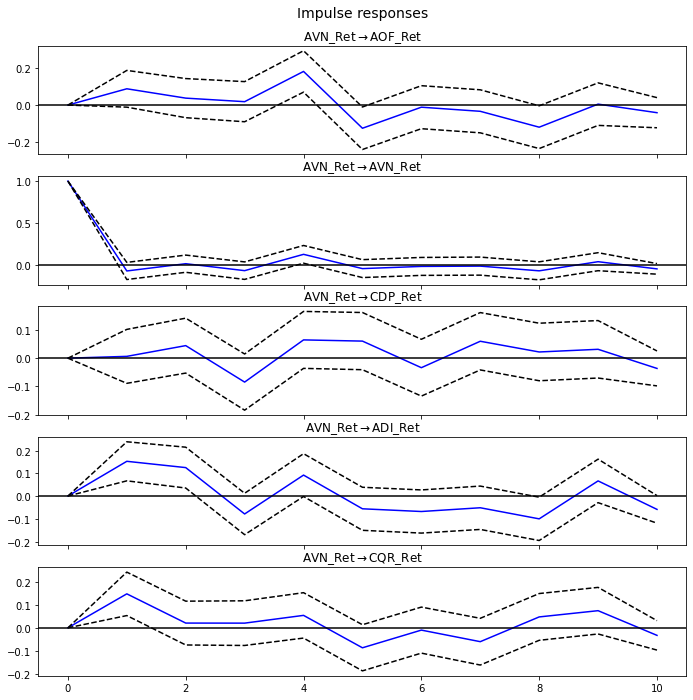

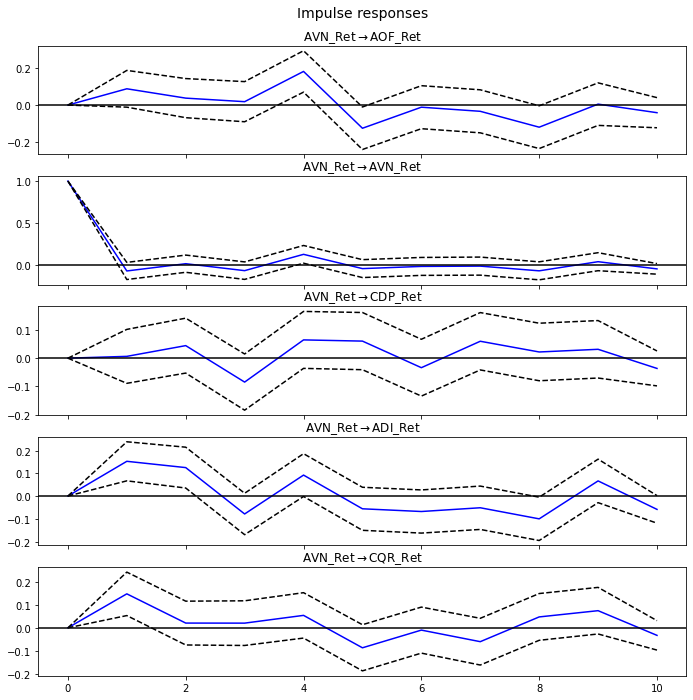

In [ ]:
irf.plot(impulse='AVN_Ret')

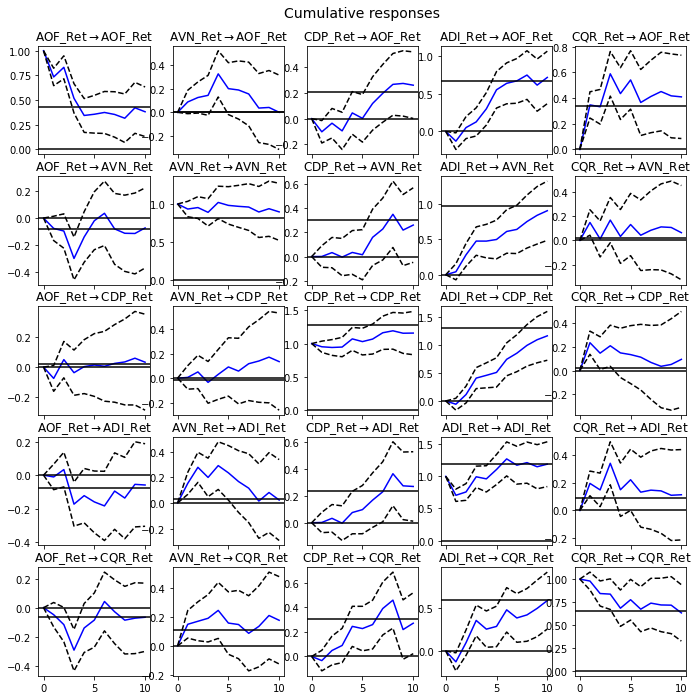

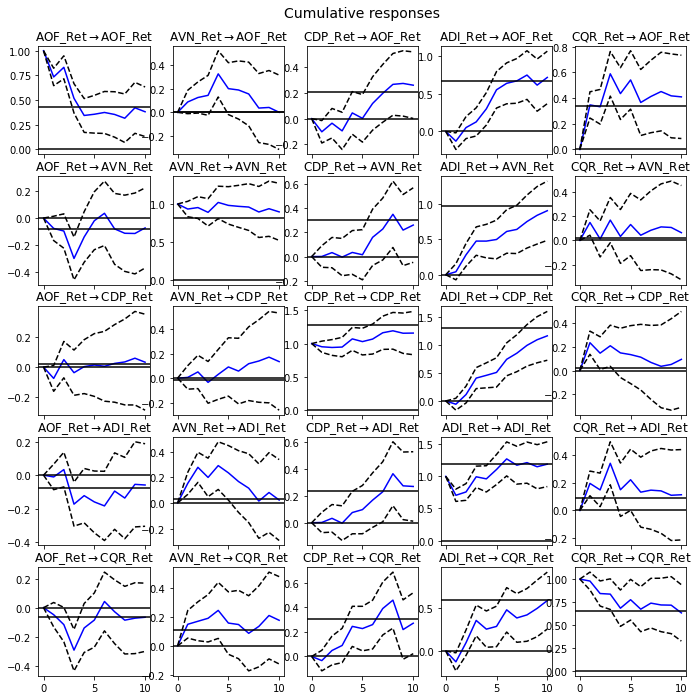

In [ ]:
irf.plot_cum_effects(orth=False)

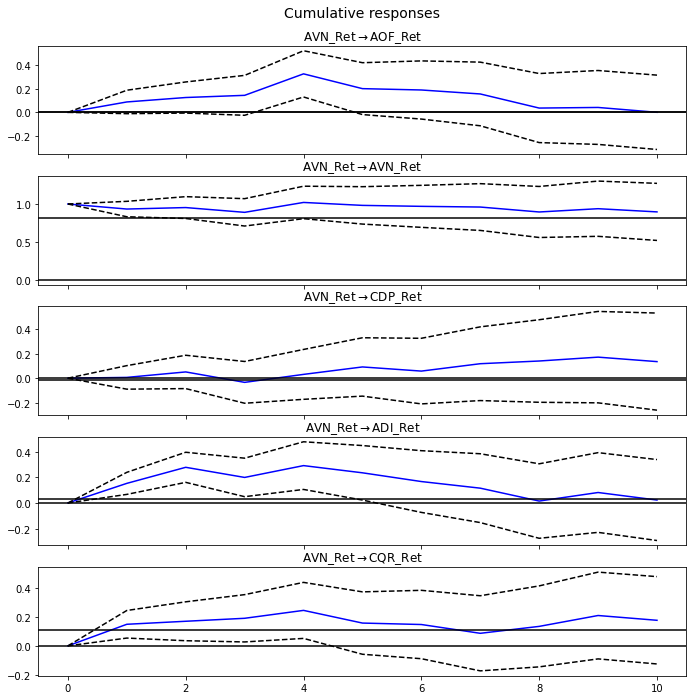

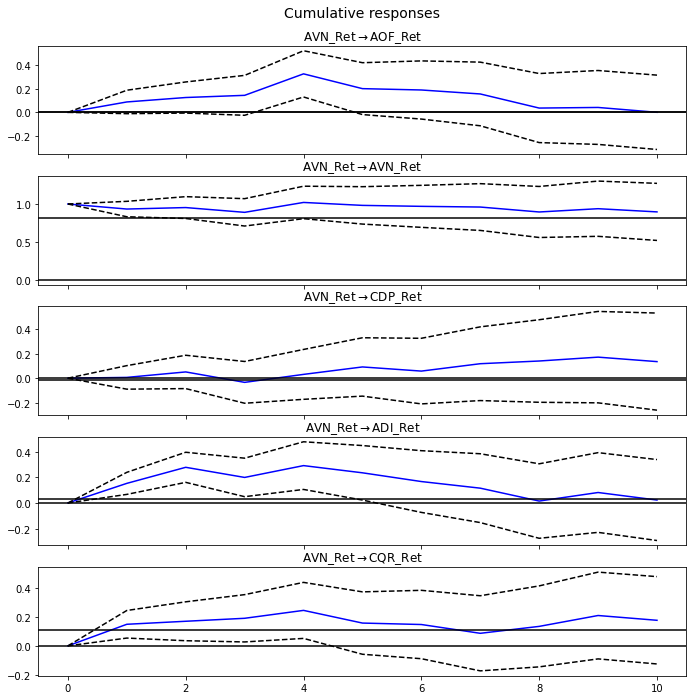

In [ ]:
irf.plot_cum_effects(impulse='AVN_Ret', orth=False)

以下施工中
---

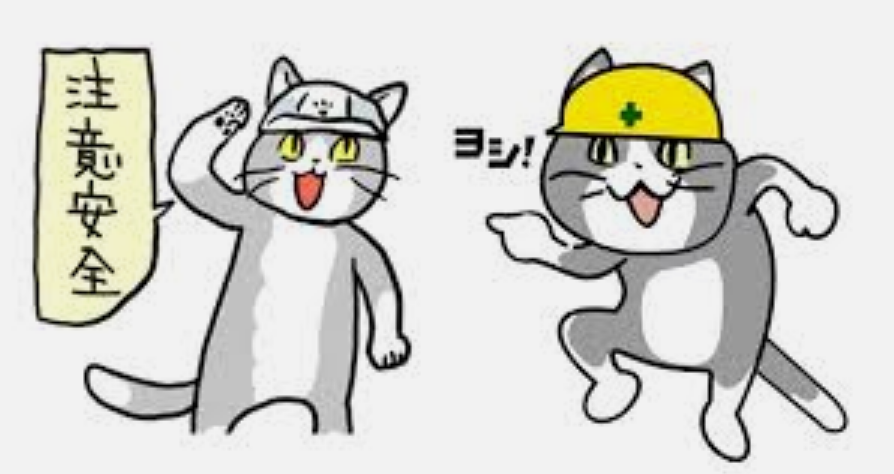

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import HTML

init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import plotly.offline as pyo
import plotly.express as ex
import plotly.figure_factory as ff

pyo.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("flchain", "survival").data
data

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.1,0,1039,1,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...
7869,52,F,1995,1.210,1.610,6,1.0,0,4997,0,NaN
7870,52,F,1999,0.858,0.581,1,0.8,0,3652,0,NaN
7871,54,F,2002,1.700,1.720,8,NaN,0,2507,0,NaN
7872,53,F,1995,1.710,2.690,9,NaN,0,4982,0,NaN


In [ ]:
df = data.loc[data.sex == "F", :]
df

,age,sex,sample.yr,kappa,lambda,flc.grp,creatinine,mgus,futime,death,chapter
0,97,F,1997,5.700,4.860,10,1.7,0,85,1,Circulatory
1,92,F,2000,0.870,0.683,1,0.9,0,1281,1,Neoplasms
2,94,F,1997,4.360,3.850,10,1.4,0,69,1,Circulatory
3,92,F,1996,2.420,2.220,9,1.0,0,115,1,Circulatory
4,93,F,1996,1.320,1.690,6,1.1,0,1039,1,Circulatory
...,...,...,...,...,...,...,...,...,...,...,...
7869,52,F,1995,1.210,1.610,6,1.0,0,4997,0,NaN
7870,52,F,1999,0.858,0.581,1,0.8,0,3652,0,NaN
7871,54,F,2002,1.700,1.720,8,NaN,0,2507,0,NaN
7872,53,F,1995,1.710,2.690,9,NaN,0,4982,0,NaN


In [ ]:
sf = sm.SurvfuncRight(df["futime"], df["death"])

In [ ]:
sf

In [ ]:
sf.summary().head()

,Surv prob,Surv prob SE,num at risk,num events
Time,,,,
0,0.999310,0.000398,4350,3.0
1,0.998851,0.000514,4347,2.0
2,0.998621,0.000563,4343,1.0
3,0.997931,0.000689,4342,3.0
4,0.997471,0.000762,4338,2.0


In [ ]:
sf.quantile(0.25)
sf.quantile_ci(0.25)

(3776, 4166)

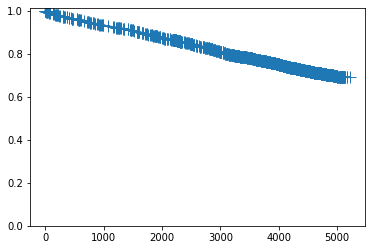

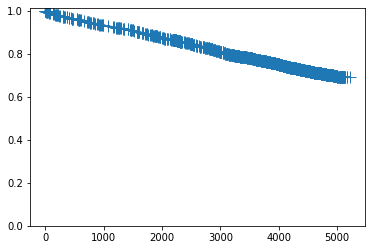

In [ ]:
sf.plot()

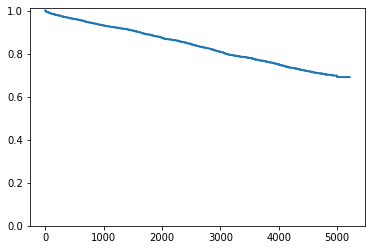

In [ ]:
fig = sf.plot()
ax = fig.get_axes()[0]
pt = ax.get_lines()[1]
pt.set_visible(False)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

data = sm.datasets.get_rdataset("flchain", "survival").data
del data["chapter"]
data = data.dropna()
data["lam"] = data["lambda"]
data["female"] = (data["sex"] == "F").astype(int)
data["year"] = data["sample.yr"] - min(data["sample.yr"])
status = data["death"].values

mod = smf.phreg("futime ~ 0 + age + female + creatinine + "
                "np.sqrt(kappa) + np.sqrt(lam) + year + mgus",
                data, status=status, ties="efron")
rslt = mod.fit()
print(rslt.summary())

                           Results: PHReg
Model:                      PH Reg         Sample size:         6524
Dependent variable:         futime         Num. events:         1962
Ties:                       Efron                                   
--------------------------------------------------------------------
                log HR log HR SE   HR      t    P>|t|  [0.025 0.975]
--------------------------------------------------------------------
age             0.1012    0.0025 1.1065 40.9289 0.0000 1.1012 1.1119
female         -0.2817    0.0474 0.7545 -5.9368 0.0000 0.6875 0.8280
creatinine      0.0134    0.0411 1.0135  0.3271 0.7436 0.9351 1.0985
np.sqrt(kappa)  0.4047    0.1147 1.4988  3.5288 0.0004 1.1971 1.8766
np.sqrt(lam)    0.7046    0.1117 2.0230  6.3056 0.0000 1.6251 2.5183
year            0.0477    0.0192 1.0489  2.4902 0.0128 1.0102 1.0890
mgus            0.3160    0.2532 1.3717  1.2479 0.2121 0.8350 2.2532
Confidence intervals are for the hazard ratios
